In [1]:
import os, numpy as np, matplotlib.pyplot as plt, nibabel as nib
from nibabel.testing import data_path
from scipy.interpolate import griddata
from tqdm import tqdm
import pandas as pd
from interpolation import *

In [2]:
def show(self, cmap=None):
        cmap = cmap or plt.cm.gray
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        ax.imshow(self, cmap=cmap)
        ax.set_axis_off()
        #plt.show()
        plt.ioff()
        plt.close()
        return fig

### Załadowujemy trójwymiarową maskę z pliku .nii

In [ ]:
break_mask(input_path='../../data/001_25_mask.nii',
              output_path='img_mask_data_broken_1.nii.gz',
              direction=1)

### Teraz nalezy ocenic blad takiej interpolacji
Ale to zrobimy pozniej.
(img_mask - interp_mask) **2 ( element wise )


### Teraz interpolacja z konturow.

Dla kazdego skrawka w plaszczyznie koronalnej.

img_mask_data[:,y,:]

wizualizujemy to i bierzemy 

In [15]:
img_mask = nib.load('img_mask_data_broken_1.nii.gz')

affine = img_mask.get_affine()
img_mask_data = img_mask.get_fdata()

img_mask_broken = break_mask(img_mask_data, direction=1)

img_mask_data = img_mask_broken 

fig_93 = show(img_mask_data[:,93,:])
slice_i = img_mask_data[:,93,:]
np.unique(slice_i)
fig_93_2 = show(slice_i==2)
y2, x2 = np.where(slice_i==2)
df = pd.DataFrame()
df['y'] = y2
df['x'] = x2
df['y'].min()
gorny_kontur = df.groupby('x').min().reset_index()
#gorny_kontur.plot(kind='scatter', x='x', y='y')
dolny_kontur = df.groupby('x').max().reset_index()
#dolny_kontur.plot(kind='scatter', x='x', y='y')
kontur = pd.concat([gorny_kontur, dolny_kontur])
#kontur.plot(kind='scatter', x='x', y='y')
#plt.gca().invert_yaxis()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 81/81 [00:00<00:00, 1929.68it/s]


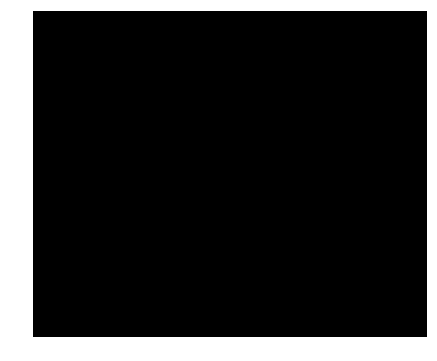

In [14]:
show(np.nan_to_num(img_mask_broken[:,93,:]))

### Wybór skrawka
Do analizy wybrałem skrawek o numerze 93, bo półkule są na nim dobrze oddzielone.

skrawek y=93  | skrawek y=93 (druga polkula)
- | - 
{{fig_93}} | {{fig_93_2}}

### Bierzemy gorny i dolny kontur:
{{kontur.plot(kind='scatter', x='x', y='y'); plt.gca().invert_yaxis()}}

### powiedzmy ze wyglada to prawie ok;
oprocz tego ze kontur sie nie zamyka ale to wezmiemy dla kazdego x wypelnimy y pomiedzy
konturami dwojka
(nalozymy taka maske albo cus)
jest problem z tymi dwoma kropkami.

### to teraz wybierzmy sobie dolny kontur i znajdzmy dolny kontur dla kazdego skrawka w plaszczyznie koronalnej


In [32]:
#pd.DataFrame(grid_z2[:,93],columns=['y']).reset_index().plot()

NameError: name 'grid_x' is not defined

In [16]:
dolny_grid_z2, gorny_grid_z2 = prawidlowa_interpolacja_konturow_2D(img_mask_data, direction=1)
con_interp = fill_interp_contours(img_mask_data, gorny_grid_z2, dolny_grid_z2)

100%|██████████| 405/405 [00:03<00:00, 130.61it/s]


In [65]:
#pd.DataFrame(grid_z2[:,93],columns=['y']).reset_index().plot(kind='scatter',x='index',y='y')

In [20]:
f1 = show(np.nan_to_num(con_interp[:,94,:]))
f2 = show(np.nan_to_num(img_mask_data[:,94,:]))

skrawek y=93  | skrawek y=93 (interpolowany)
- | - 
{{f2}} | {{f1}}

Zadzialalo, chociaz popsulem maske z krokiem 5 a interpolowalem z krokiem 2

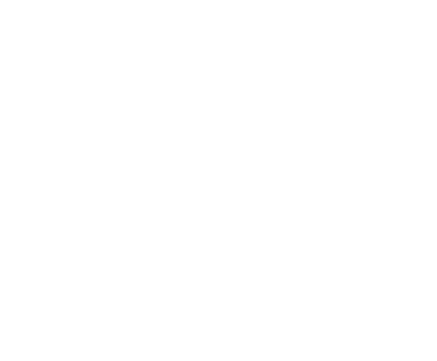

In [18]:
show(con_interp[:,94,:])

In [142]:
points = np.random.rand(1000, 2)

In [143]:
point_list = []
for i in tqdm(range(x_max)):
    for j in range(0, z_max, 2):
        point_list.append([i,j])
points = np.array(point_list)

100%|██████████| 185/185 [00:00<00:00, 2379.30it/s]


In [144]:
values = img_mask_data[points[:,0],points[:,1],points[:,2]]

IndexError: index 2 is out of bounds for axis 1 with size 2

### trzeba sie zastanowic nad inputem
Najwygodniej zeby inputem byl array w ktorym po prostu w nieokreslonych
komorkach bylo None

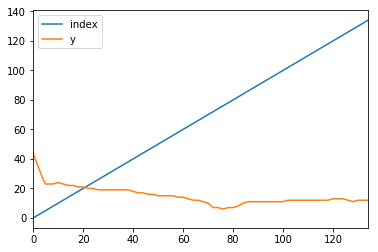

In [146]:
#trzeba zmienic grida zeby sie zaczynal tak od 25

In [114]:
pd.DataFrame(points, columns=['x','z'])

,x,z
0,0,0
1,0,2
2,0,4
3,0,6
4,0,8
5,0,10
6,0,12
7,0,14
8,0,16
9,0,18
